In [ ]:
#Read the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Use pd.read_excel for Excel files
df = pd.read_excel("/content/drive/MyDrive/data_academic_performance.xlsx")
print(df.head())

            COD_S11 GENDER                         EDU_FATHER  \
0  SB11201210000129      F  Incomplete Professional Education   
1  SB11201210000137      F                 Complete Secundary   
2  SB11201210005154      M                           Not sure   
3  SB11201210007504      F                           Not sure   
4  SB11201210007548      M    Complete professional education   

                         EDU_MOTHER                                OCC_FATHER  \
0  Complete technique or technology  Technical or professional level employee   
1   Complete professional education                             Entrepreneur    
2                          Not sure                               Independent   
3                          Not sure                          Other occupation   
4   Complete professional education                                 Executive   

                 OCC_MOTHER    STRATUM                              SISBEN  \
0                      Home  Stratum 4  It i

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COD_S11           12411 non-null  object 
 1   GENDER            12411 non-null  object 
 2   EDU_FATHER        12411 non-null  object 
 3   EDU_MOTHER        12411 non-null  object 
 4   OCC_FATHER        12411 non-null  object 
 5   OCC_MOTHER        12411 non-null  object 
 6   STRATUM           12411 non-null  object 
 7   SISBEN            12411 non-null  object 
 8   PEOPLE_HOUSE      12411 non-null  object 
 9   Unnamed: 9        0 non-null      float64
 10  INTERNET          12411 non-null  object 
 11  TV                12411 non-null  object 
 12  COMPUTER          12411 non-null  object 
 13  WASHING_MCH       12411 non-null  object 
 14  MIC_OVEN          12411 non-null  object 
 15  CAR               12411 non-null  object 
 16  DVD               12411 non-null  object

In [ ]:
# Handle the missing values

# Check for missing values
missing_values = df.isnull().sum()

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5, axis=1)

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Fill missing values in numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Check for remaining missing values
missing_values = df.isnull().sum()

# Print the updated DataFrame
print(df.head())


            COD_S11 GENDER                         EDU_FATHER  \
0  SB11201210000129      F  Incomplete Professional Education   
1  SB11201210000137      F                 Complete Secundary   
2  SB11201210005154      M                           Not sure   
3  SB11201210007504      F                           Not sure   
4  SB11201210007548      M    Complete professional education   

                         EDU_MOTHER                                OCC_FATHER  \
0  Complete technique or technology  Technical or professional level employee   
1   Complete professional education                             Entrepreneur    
2                          Not sure                               Independent   
3                          Not sure                          Other occupation   
4   Complete professional education                                 Executive   

                 OCC_MOTHER    STRATUM                              SISBEN  \
0                      Home  Stratum 4  It i

In [ ]:
# prompt: perform feature engineering

import pandas as pd
# Create dummy variables for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=10)
df = pd.DataFrame(selector.fit_transform(df, df['PERCENTILE']), columns=df.columns[selector.get_support()])

# Print the final DataFrame
print(df.head())


     CR_S11   BIO_S11    QR_PRO    CR_PRO    CC_PRO   ENG_PRO      G_SC  \
0  2.017020  1.976393 -0.283043  1.113326  0.407484  1.000297  0.748089   
1  1.418544  3.231276  0.863720 -0.874714  0.924892  1.196422  0.834626   
2 -1.174850 -1.608987 -2.664779 -2.212122 -1.420690 -0.960943 -2.150894   
3 -0.576374  0.004434 -0.547680 -0.983152  0.579953  0.490375 -0.247084   
4  0.421085  1.886759  0.731401  1.149472  1.338818  1.274871  1.526921   

   PERCENTILE  2ND_DECILE  QUARTILE  
0    0.871921    0.892559  0.828531  
1    0.910581    0.892559  0.828531  
2   -2.375522   -2.311591 -2.235808  
3   -0.055920    0.091521 -0.192915  
4    1.142541    0.892559  0.828531  


In [ ]:
# prompt: perform normalization

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the normalized DataFrame
print(df.head())


     CR_S11   BIO_S11    QR_PRO    CR_PRO    CC_PRO   ENG_PRO      G_SC  \
0  0.750000  0.842697  0.707071  0.929293  0.707071  0.929293  0.680952   
1  0.671053  1.000000  0.969697  0.373737  0.858586  0.979798  0.690476   
2  0.328947  0.393258  0.161616  0.000000  0.171717  0.424242  0.361905   
3  0.407895  0.595506  0.646465  0.343434  0.757576  0.797980  0.571429   
4  0.539474  0.831461  0.939394  0.939394  0.979798  1.000000  0.766667   

   PERCENTILE  2ND_DECILE  QUARTILE  
0    0.909091        1.00  1.000000  
1    0.919192        1.00  1.000000  
2    0.060606        0.00  0.000000  
3    0.666667        0.75  0.666667  
4    0.979798        1.00  1.000000  


In [ ]:
# prompt: use t-sne algorithm for dimensionality reduction

import pandas as pd
from sklearn.manifold import TSNE

# Initialize the TSNE model with desired parameters
tsne_model = TSNE(n_components=2, learning_rate='auto',
                 init='random', perplexity=3, random_state=0)

# Reduce dimensionality of the data
df_tsne = tsne_model.fit_transform(df)

# Convert the results to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])

# Print the transformed data
print(df_tsne.head())


   Dimension 1  Dimension 2
0    12.119875   -83.061653
1   -35.230316    11.188711
2    23.708872    95.737335
3    89.458466     4.743572
4    -5.663692    21.906811


In [ ]:
# prompt: perform feature selection

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features based on F-regression
selector = SelectKBest(f_regression, k=10)
df = pd.DataFrame(selector.fit_transform(df, df['PERCENTILE']), columns=df.columns[selector.get_support()])

# Print the selected features
print(df.head())


     CR_S11   BIO_S11    QR_PRO    CR_PRO    CC_PRO   ENG_PRO      G_SC  \
0  0.750000  0.842697  0.707071  0.929293  0.707071  0.929293  0.680952   
1  0.671053  1.000000  0.969697  0.373737  0.858586  0.979798  0.690476   
2  0.328947  0.393258  0.161616  0.000000  0.171717  0.424242  0.361905   
3  0.407895  0.595506  0.646465  0.343434  0.757576  0.797980  0.571429   
4  0.539474  0.831461  0.939394  0.939394  0.979798  1.000000  0.766667   

   PERCENTILE  2ND_DECILE  QUARTILE  
0    0.909091        1.00  1.000000  
1    0.919192        1.00  1.000000  
2    0.060606        0.00  0.000000  
3    0.666667        0.75  0.666667  
4    0.979798        1.00  1.000000  


In [ ]:
# prompt: Training and testing classification models using various machine learning algorithms like Xgboost, Logistic Regression, SVM, KNN, and Random Forest to predict student performance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Separate features and target
X = df.drop('PERCENTILE', axis=1)
# Convert 'PERCENTILE' to categorical by defining appropriate thresholds or bins
# For example, you can create categories like 'Low', 'Medium', 'High' based on percentile ranges.
y = pd.cut(df['PERCENTILE'], bins=[0, 0.33, 0.66, 1], labels=[0, 1, 2], include_lowest=True)  # Adjust bins and labels as needed , include the lowest value to avoid NaNs

# Handle potential NaN values in the target variable
# Note: Filling NaN values with -1 to distinguish them during model training
y = y.cat.add_categories(-1).fillna(-1) # Fill NaN values with a new category

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Model: Logistic Regression, Accuracy: 0.9343536045106726
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       340
           1       0.91      0.84      0.87       664
           2       0.95      0.97      0.96      1479

    accuracy                           0.93      2483
   macro avg       0.92      0.92      0.92      2483
weighted avg       0.93      0.93      0.93      2483

[[ 320   20    0]
 [  35  558   71]
 [   0   37 1442]]
Model: SVM, Accuracy: 0.9448248086991542
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       340
           1       0.91      0.88      0.89       664
           2       0.96      0.98      0.97      1479

    accuracy                           0.94      2483
   macro avg       0.94      0.93      0.93      2483
weighted avg       0.94      0.94      0.94      2483

[[ 314   26    0]
 [  19  583   62]
 [   0   30 1449]]
Model: KNN, Accuracy: 0.906564

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten # Import Flatten
from tensorflow.keras.optimizers import Adam

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# Adjust the pooling layer or remove it
#cnn_model.add(MaxPooling1D(pool_size=2)) # This line is causing the error
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

# Compile and train the CNN model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Evaluate the CNN model
y_pred_cnn = cnn_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
accuracy_cnn = accuracy_score(y_test, np.argmax(y_pred_cnn, axis=1))
print(f"CNN Model Accuracy: {accuracy_cnn}")

Epoch 1/10
311/311 [==============================] - 2s 3ms/step - loss: 0.3879 - accuracy: 0.8301
Epoch 2/10
311/311 [==============================] - 1s 3ms/step - loss: 0.2294 - accuracy: 0.8965
Epoch 3/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1989 - accuracy: 0.9053
Epoch 4/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1802 - accuracy: 0.9099
Epoch 5/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9143
Epoch 6/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1607 - accuracy: 0.9233
Epoch 7/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1545 - accuracy: 0.9269
Epoch 8/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1443 - accuracy: 0.9318
Epoch 9/10
311/311 [==============================] - 1s 3ms/step - loss: 0.1362 - accuracy: 0.9380
Epoch 10/10
78/78 [==============================] - 0s 2ms/step
CNN Model Accuracy: 0.9488521949254

In [ ]:
# prompt: use LSTM model to calculate the accuracy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=128, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))

# Compile and train the LSTM model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
lstm_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Evaluate the LSTM model
y_pred_lstm = lstm_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
accuracy_lstm = accuracy_score(y_test, np.argmax(y_pred_lstm, axis=1))
print(f"LSTM Model Accuracy: {accuracy_lstm}")


Epoch 1/10
311/311 [==============================] - 9s 19ms/step - loss: 0.4540 - accuracy: 0.8010
Epoch 2/10
311/311 [==============================] - 6s 18ms/step - loss: 0.2699 - accuracy: 0.8822
Epoch 3/10
311/311 [==============================] - 6s 19ms/step - loss: 0.2389 - accuracy: 0.8949
Epoch 4/10
311/311 [==============================] - 6s 18ms/step - loss: 0.2234 - accuracy: 0.8973
Epoch 5/10
311/311 [==============================] - 6s 19ms/step - loss: 0.2024 - accuracy: 0.9010
Epoch 6/10
311/311 [==============================] - 6s 18ms/step - loss: 0.1882 - accuracy: 0.9057
Epoch 7/10
311/311 [==============================] - 6s 19ms/step - loss: 0.1857 - accuracy: 0.9039
Epoch 8/10
311/311 [==============================] - 6s 19ms/step - loss: 0.1754 - accuracy: 0.9096
Epoch 9/10
311/311 [==============================] - 6s 18ms/step - loss: 0.1730 - accuracy: 0.9117
Epoch 10/10
78/78 [==============================] - 1s 4ms/step
LSTM Model Accuracy: 0.913

In [ ]:
X_train

,CR_S11,BIO_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,G_SC,2ND_DECILE,QUARTILE
1180,0.302632,0.528090,0.292929,0.424242,0.343434,0.343434,0.509524,0.50,0.333333
11217,0.618421,0.685393,0.989899,0.797980,0.868687,0.929293,0.747619,1.00,1.000000
1911,0.473684,0.494382,0.878788,0.858586,0.949495,0.929293,0.685714,1.00,1.000000
3088,0.526316,0.752809,0.898990,0.929293,0.959596,0.757576,0.661905,1.00,1.000000
8042,0.526316,0.561798,0.777778,0.767677,0.373737,0.717172,0.561905,0.75,0.666667
...,...,...,...,...,...,...,...,...,...
11964,0.355263,0.483146,0.393939,0.141414,0.454545,0.171717,0.438095,0.25,0.000000
5191,0.447368,0.584270,0.797980,0.959596,0.454545,0.636364,0.633333,1.00,1.000000
5390,0.368421,0.494382,0.414141,0.575758,0.121212,0.737374,0.480952,0.25,0.333333
860,0.197368,0.438202,0.808081,0.424242,0.000000,0.505051,0.509524,0.50,0.333333


In [ ]:
# prompt: Using dataframe X_train:

X_train.describe()


,CR_S11,BIO_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,G_SC,2ND_DECILE,QUARTILE
count,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000
mean,0.485130,0.595288,0.773124,0.621282,0.589404,0.672964,0.599727,0.723056,0.732440
std,0.132725,0.125661,0.227793,0.280049,0.292776,0.256549,0.110345,0.311569,0.324959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394737,0.505618,0.656566,0.414141,0.353535,0.505051,0.523810,0.500000,0.666667
50%,0.486842,0.595506,0.848485,0.676768,0.646465,0.737374,0.600000,0.750000,1.000000
75%,0.565789,0.674157,0.959596,0.858586,0.848485,0.878788,0.676190,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train

1180     1
11217    2
1911     2
3088     2
8042     1
        ..
11964    0
5191     2
5390     1
860      1
7270     2
Name: PERCENTILE, Length: 9928, dtype: category
Categories (4, int64): [0 < 1 < 2 < -1]

In [ ]:
X_test

,CR_S11,BIO_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,G_SC,2ND_DECILE,QUARTILE
9985,0.618421,0.943820,0.989899,0.969697,0.747475,0.909091,0.723810,1.00,1.000000
7476,0.618421,0.617978,0.979798,0.878788,0.868687,0.777778,0.690476,1.00,1.000000
6867,0.500000,0.651685,0.898990,0.838384,0.949495,0.858586,0.700000,1.00,1.000000
5350,0.618421,0.550562,0.888889,0.848485,0.696970,0.898990,0.657143,1.00,1.000000
9669,0.355263,0.528090,0.414141,0.373737,0.191919,0.070707,0.409524,0.00,0.000000
...,...,...,...,...,...,...,...,...,...
394,0.434211,0.752809,0.858586,0.848485,0.797980,0.090909,0.604762,0.75,1.000000
8956,0.618421,0.640449,0.757576,0.323232,0.282828,0.393939,0.500000,0.50,0.333333
8613,0.394737,0.550562,0.727273,0.585859,0.545455,0.292929,0.528571,0.50,0.666667
2928,0.500000,0.449438,0.595960,0.191919,0.060606,0.666667,0.452381,0.25,0.333333


In [ ]:
# prompt: Using dataframe X_test:

X_test.head()


,CR_S11,BIO_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,G_SC,2ND_DECILE,QUARTILE
9985,0.618421,0.943820,0.989899,0.969697,0.747475,0.909091,0.723810,1.0,1.0
7476,0.618421,0.617978,0.979798,0.878788,0.868687,0.777778,0.690476,1.0,1.0
6867,0.500000,0.651685,0.898990,0.838384,0.949495,0.858586,0.700000,1.0,1.0
5350,0.618421,0.550562,0.888889,0.848485,0.696970,0.898990,0.657143,1.0,1.0
9669,0.355263,0.528090,0.414141,0.373737,0.191919,0.070707,0.409524,0.0,0.0


In [ ]:
y_test

9985     2
7476     2
6867     2
5350     2
9669     0
        ..
394      2
8956     1
8613     1
2928     0
11187    2
Name: PERCENTILE, Length: 2483, dtype: category
Categories (4, int64): [0 < 1 < 2 < -1]

In [ ]:
# prompt: calculate the precsion, recall, f1_score for the above model

from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       340
           1       0.91      0.84      0.87       664
           2       0.95      0.97      0.96      1479

    accuracy                           0.93      2483
   macro avg       0.92      0.92      0.92      2483
weighted avg       0.93      0.93      0.93      2483

[[ 320   20    0]
 [  35  558   71]
 [   0   37 1442]]
Model: SVM
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       340
           1       0.91      0.88      0.89       664
           2       0.96      0.98      0.97      1479

    accuracy                           0.94      2483
   macro avg       0.94      0.93      0.93      2483
weighted avg       0.94      0.94      0.94      2483

[[ 314   26    0]
 [  19  5

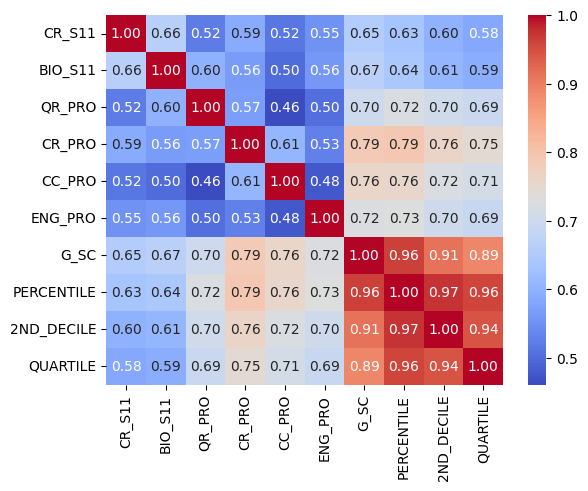

In [ ]:
# prompt: plot the correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Display the heatmap
plt.show()


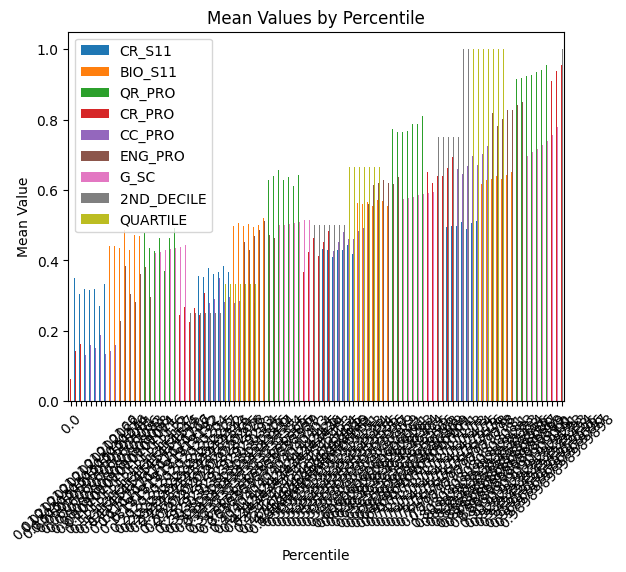

In [ ]:
# prompt: generate a graphical representation

import matplotlib.pyplot as plt
# Use the following code to generate a bar plot of the mean values for each category in the 'PERCENTILE' column:

df.groupby('PERCENTILE').mean().plot(kind='bar')

# Add title and axis labels
plt.title('Mean Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Mean Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


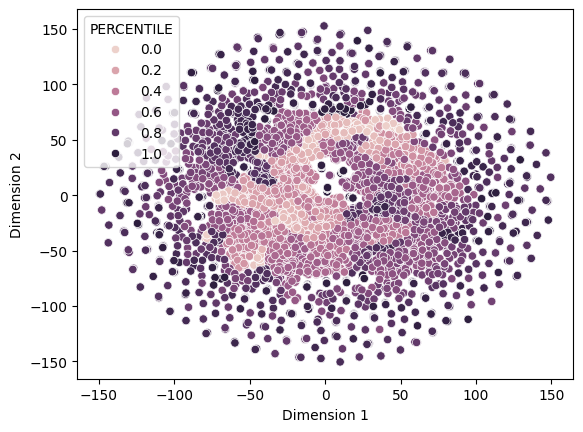

In [ ]:
# prompt: QR_PRO and PERCENTILE using dimensionality
# reduction by tSNE. and perform plotting

import pandas as pd
import matplotlib.pyplot as plt
# Select QR_PRO and PERCENTILE columns
df_subset = df[['QR_PRO', 'PERCENTILE']]

# Reduce dimensionality using tSNE
df_tsne = tsne_model.fit_transform(df_subset)

# Convert to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])

# Add original labels
df_tsne['PERCENTILE'] = df_subset['PERCENTILE']

# Plot the data points colored by PERCENTILE
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='PERCENTILE', data=df_tsne)
plt.show()


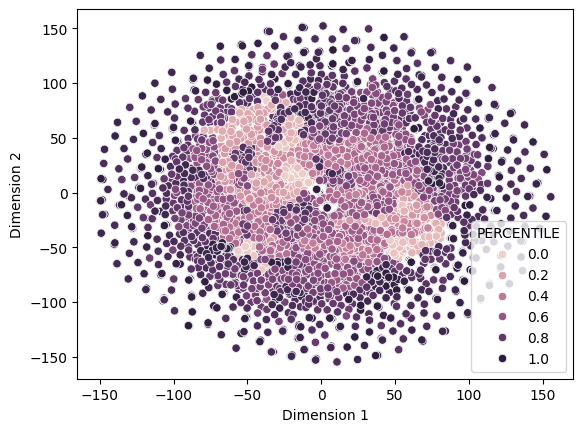

In [ ]:
# prompt: QR_PRO and PERCENTILE using dimensionality
# reduction by tSNE. and perform plotting

import pandas as pd
import matplotlib.pyplot as plt
# Select QR_PRO and PERCENTILE columns
df_subset = df[['CR_PRO', 'PERCENTILE']]

# Reduce dimensionality using tSNE
df_tsne = tsne_model.fit_transform(df_subset)

# Convert to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])

# Add original labels
df_tsne['PERCENTILE'] = df_subset['PERCENTILE']

# Plot the data points colored by PERCENTILE
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='PERCENTILE', data=df_tsne)
plt.show()